# Detect Pneumonia Using X-Ray Images with CNNs and Transfer Learning

## Extracting the files from tar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import tarfile

# def extract_tar_gz(file_path, output_path):
#     with tarfile.open(file_path, 'r:gz') as tar:
#         tar.extractall(path=output_path)

# # Use it like this:
# extract_tar_gz('/content/drive/MyDrive/Detecting Pneumonia/xray_dataset.tar.gz', '/content/drive/MyDrive/Detecting Pneumonia')

In [ ]:
# to downlode the file directly to the session
# !wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/xray_dataset.tar.gz

## Importing the libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



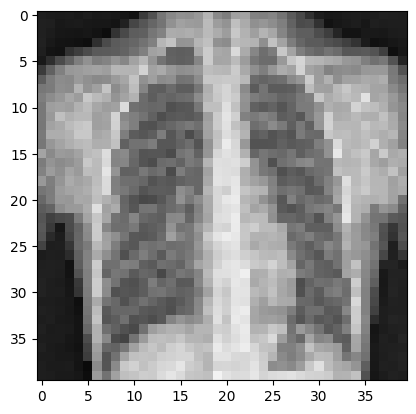

In [ ]:
#printing the imgage for visulization
img_path = '/content/drive/MyDrive/Detecting Pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg'
img = keras.preprocessing.image.load_img(img_path, target_size=(40, 40))
plt.imshow(img)

## Data set creation using image_dataset_from_directory

In [ ]:
batch_size = 256
img_height = 256
img_width = 256

from tensorflow.keras.utils import image_dataset_from_directory

data_dir_train = '/content/drive/MyDrive/Detecting Pneumonia/chest_xray/train'
data_dir_test = '/content/drive/MyDrive/Detecting Pneumonia/chest_xray/test'

#train data
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode = 'grayscale')


#val data
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode = 'grayscale')

#test data
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode = 'grayscale')



Found 5232 files belonging to 2 classes.
Using 4186 files for training.
Found 5232 files belonging to 2 classes.
Using 1046 files for validation.
Found 624 files belonging to 2 classes.


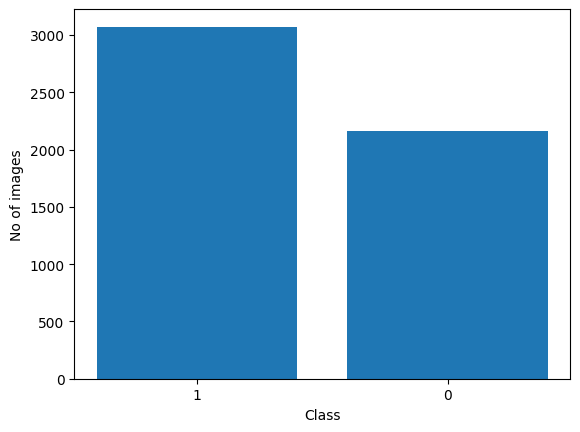

In [ ]:
no_class_1 = 0
for a in train_ds:
  x = tf.reduce_sum(a[1])
  x.numpy()
  no_class_1 += x.numpy()



In [ ]:
import matplotlib.pyplot as plt

data = {'1': no_class_1,'0':5232-no_class_1}
plt.bar(data.keys(),data.values())
plt.xlabel('Class')
plt.ylabel('No of images')
plt.show()

In [ ]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [ ]:
train_ds.

In [ ]:
class_names = val_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


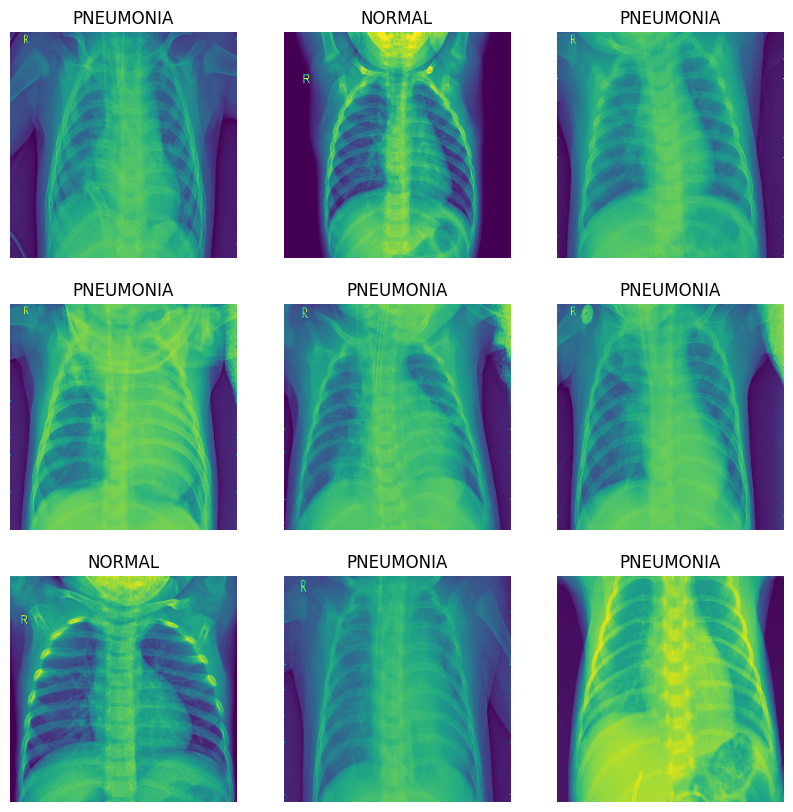

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for images, labels in train_ds:
  print(images[0].shape)
  break


(256, 256, 1)


## Standardised datasets

In [ ]:
def per_image_standardization(image, label):
    image = tf.image.per_image_standardization(image)
    return image, label

**Hypothesis 1:** Standardisation of image will not provide better accuracy for CNN model then non-std images

# Models

## Simple CNN

Here we used SparseCategoricalentropy as we are using dataset object of keras for parsing the data in which labels are

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

class_num = 1
SimpleCNN = Sequential([
    Conv2D(filters = 32, kernel_size = 3, activation= 'relu', input_shape = (256, 256, 1), padding = 'same', kernel_initializer='he_normal'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(20, activation = 'relu'),
    Dense(class_num, activation = 'sigmoid')
])
print(SimpleCNN.summary())
SimpleCNN.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01),
                  loss = keras.losses.BinaryCrossentropy(from_logits = False),
                  metrics= keras.metrics.BinaryAccuracy())
SimpleCNN.fit(train_ds, epochs = 5, validation_data = val_ds)
score = SimpleCNN.evaluate(test_ds, verbose=0)
print(score)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 524288)            0         
                                                                 
 dense_2 (Dense)             (None, 20)                10485780  
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 10486121 (40.00 MB)
Trainable params: 10486121 (40.00 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [ ]:
SimpleCNN.save_weights('/content/drive/MyDrive/Detecting Pneumonia/model_wights/SimpleCNN')

### CNN with filters = 40

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
class_num = 1
SimpleCNN_f = Sequential([
    Conv2D(filters = 40, kernel_size = 3, activation= 'relu', input_shape = (256, 256, 1), padding = 'same', kernel_initializer='he_normal'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(class_num)
])
print(SimpleCNN_f.summary())
SimpleCNN_f.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001),
                  loss = keras.losses.BinaryCrossentropy(from_logits = True),
                  metrics= keras.metrics.BinaryAccuracy())
SimpleCNN_f.fit(train_ds, epochs = 5, validation_data = val_ds)
score = SimpleCNN_f.evaluate(test_ds, verbose=0)
print("_"*80)
print(score)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 40)      400       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 40)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 655360)            0         
                                                                 
 dense (Dense)               (None, 128)               83886208  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 83886737 (320.00 MB)
Trainable params: 83886737 (320.00 MB)
Non-trainable params: 0 (0.00 Byte)
____________

### CNN with kernel Siz  = 4

In [ ]:
SimpleCNN_ker = Sequential([
    Conv2D(filters = 32, kernel_size = 4, activation= 'relu', input_shape = (256, 256, 1), padding = 'same', kernel_initializer='he_normal'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(10, activation = 'relu')

])

print(SimpleCNN_ker.summary())

SimpleCNN_ker.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001),
                  loss = keras.losses.BinaryCrossentropy(),
                  metrics= keras.metrics.BinaryAccuracy())
SimpleCNN_ker.fit(train_ds, epochs = 4, validation_data = val_ds)
score2 = SimpleCNN_ker.evaluate(test_ds, verbose=0)
print(score2)

### CNN using Standardized data set

In [ ]:
train_ds_s = train_ds.map(per_image_standardization)
test_ds_s = test_ds.map(per_image_standardization)
val_ds_s = val_ds.map(per_image_standardization)


In [ ]:
SimpleCNN_std = Sequential([
    Conv2D(filters = 32, kernel_size = 4, activation= 'relu', input_shape = (256, 256, 1), padding = 'same', kernel_initializer='he_normal'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(10, activation = 'relu')

])

print(SimpleCNN_std.summary())

SimpleCNN_std.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001),
                  loss = keras.losses.BinaryCrossentropy(),
                  metrics= keras.metrics.BinaryAccuracy())
SimpleCNN_std.fit(train_ds, epochs = 4, validation_data = val_ds)
score2 = SimpleCNN_std.evaluate(test_ds, verbose=0)
print(score2)

## Simple CNN 2

In [ ]:
call_back = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)